# **Aula 08 - Projeto Final**

# **Rede de transporte metropolitano SP**

O projeto deste módulo consiste em modelar a **rede de transporte metropolitano de SP** como um grafo.

A rede a ser implementada é a que está [neste arquivo.](http://www.metro.sp.gov.br/pdf/mapa-da-rede-metro.pdf) O arquivo pdf está também na pasta do projeto!

O arquivo `metroetrem_sp_comlinks.csv` contém grande parte (se não todas) as estações da rede. Pode ser que algumas estejam faltando -- neste caso, vocês podem adicionar as estações que estão faltando ao arquivo.

Este arquivo está sendo disponibilizado para auxiliar vocês. Mas os grupos são inteiramente livres para coletar dados de qualquer outra forma (com webscraping, por exemplo). Fiquem à vontade!

Independente da forma como os dados forem coletados, uma coisa será super necessária: **estruturar os dados de maneira adequada** para que eles possam servir de input para o networkx para a montagem do grafo, **de maneira automática**. Não é proibido, mas eu desencorajo fortemente que vocês construam o grafo manualmente com o `.add_edge()`. A ideia é que vocês construam o grafo usando programação, a partir da leitura e estruturação dos dados no arquivo! Vocês são livres em como farão isso, pesquisem e usem a criatividade!

**Requisitos:**

- Estruturação dos dados para que eles sejam usados na construção do grafo;
- Um grafo completo para toda a rede de transporte metropolitano de SP;
- Uma função que encontre o melhor caminho entre dois nós;
- Uma função que descreva a rota do melhor caminho entre dois nós;
- Uma interface de navegação para interação com usuário;

**Opcionais:**

- Caputra dos dados por webscraping ou outra ferramenta;
- Atribuição de pesos às conexões do grafo (tempo entre estações, distância, etc);
- Visualização do grafo.

In [451]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [452]:
import pandas as pd 
import numpy 

# importar as libs
from pprint import pprint

import matplotlib.pyplot as plt
import networkx as nx

In [16]:
# original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projeto_4/base_metro_origem.csv')
# original.head()

,num_lin,nome_lin,long,lat,estacao_upp,link
0,4,AMARELA,-46.723768,-23.586440,SAO PAULO MORUMBI,BUTANTA
1,4,AMARELA,-46.708157,-23.571857,BUTANTA,PINHEIROS
2,4,AMARELA,-46.701610,-23.567392,PINHEIROS,FARIA LIMA
3,4,AMARELA,-46.694102,-23.567269,FARIA LIMA,FRADIQUE COUTINHO
4,4,AMARELA,-46.684259,-23.566228,FRADIQUE COUTINHO,OSCAR FREIRE


In [11]:
# original.to_csv('/content/drive/MyDrive/Colab Notebooks/projeto_4/base_para_modificação')
# original.to_excel('/content/drive/MyDrive/Colab Notebooks/projeto_4/base_para_modificação.xlsx')

In [17]:
# original.estacao_upp.unique()

In [369]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projeto_4/base_metro_modificada.csv')
df.head(1)

,numero_linha,linha,long,lat,estacao_origem,numero_estacao_origem,estacao_baldeacao_origem,estacao_conectada,numero_estacao_conectada,estacao_baldeacao_conectada
0,4,AMARELA,"-46,723768","-23,58644",SAO PAULO MORUMBI,1,nao,BUTANTA,2,sim


In [4]:
df.linha.unique()

array(['AMARELA', 'AZUL', 'CORAL', 'DIAMANTE', 'ESMERALDA', 'JADE',
       'LILAS', 'PRATA', 'RUBI', 'SAFIRA', 'TURQUESA', 'VERDE',
       'VERMELHA'], dtype=object)

In [5]:
destino = 'BUTANTA'
origem = 'ITAPEVI'

In [18]:
linha_origem = df[['linha', 'numero_linha']].loc[ (df.estacao_conectada == origem) ]
linha_conectada = df[['linha', 'numero_linha']].loc[ (df.estacao_conectada == destino) ]
display(linha_origem)
display(linha_conectada)

num_linha_origem = df[['numero_linha']].loc[ (df.estacao_conectada == origem) ].reset_index(drop=True)
num_linha_conectada = df[['numero_linha']].loc[ (df.estacao_conectada == destino) ].reset_index(drop=True)
display(num_linha_origem)
display(num_linha_conectada)

,linha,numero_linha
50,DIAMANTE,8


,linha,numero_linha
0,AMARELA,4


,numero_linha
0,8


,numero_linha
0,4


In [218]:
linha1  = (11,7,4,3,2,5)
linha2  = (4,1,3,10,15)
linha3  = (11, 10, 1, 4, 8)
linha4  = (9, 2, 3, 1)
linha5  = (9,1,2)
linha7  = (8,1,11,10,12)
linha8  = (9,7,3)
linha9  = (5,4,8)
linha10 = (2,3,11,7,12)
linha11 = (12,3,7,2,4)
linha12 = (11,13,3,7,10)
linha13 = (12)
linha15 = (2)

In [43]:
# Testar se conecta direto
### DEPRECIADO
linha_a_conectar = 0
if   num_linha_origem == 1  :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 1
    

it is


In [ ]:
# Checar se é posssivel com 1 ou nenhuma baldeaçao
if   num_linha_origem.numero_linha[0] == 1  :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 1
elif num_linha_origem.numero_linha[0] == 2  :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 2
elif num_linha_origem.numero_linha[0] == 3  :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 3
elif num_linha_origem.numero_linha[0] == 4  :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 4
elif num_linha_origem.numero_linha[0] == 5  :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 5
elif num_linha_origem.numero_linha[0] == 7  :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 7
elif num_linha_origem.numero_linha[0] == 8  :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 8
elif num_linha_origem.numero_linha[0] == 9  :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 9
elif num_linha_origem.numero_linha[0] == 10 :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 10
elif num_linha_origem.numero_linha[0] == 11 :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 11
elif num_linha_origem.numero_linha[0] == 12 :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 12
elif num_linha_origem.numero_linha[0] == 13 :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 13
elif num_linha_origem.numero_linha[0] == 15 :
  if ((num_linha_origem in linha1) & (num_linha_final in linha1)):
    linha_a_conectar = 15

In [328]:
# Checa se é possível uma ligação usando uma outra linha como intermédio
contador_listaum = -1
while contador_listaum < 14 :
  contador_listaum += 1
  if ((num_linha_origem in listaum[contador_listaum][0]) & (num_linha_final in listaum[contador_listaum][0])):
    print('DEVE-SE REALIZAR UMA BALDEAÇÃO NA LINHA', contador_listaum, 'ANTES DE CHEGAR AO DESTINO')
    break

DEVE-SE REALIZAR UMA BALDEAÇÃO NA LINHA 1 ANTES DE CHEGAR AO DESTINO


In [319]:
num_linha_origem = 3
num_linha_final = 1

In [381]:
df['estacao_origem'].loc[ df.estacao_baldeacao_origem == 'sim'].unique()

array(['BUTANTA', 'PINHEIROS', 'PAULISTA', 'REPUBLICA', 'LUZ',
       'JABAQUARA', 'SANTA CRUZ', 'ANA ROSA', 'PARAISO', 'SE', 'ARMENIA',
       'TUCURUVI', 'BRAS', 'TATUAPE', 'CORINTHIANS ITAQUERA',
       'CALMON VIANA', 'ITAPEVI', 'JANDIRA', 'CARAPICUIBA',
       'GENERAL MIGUEL COSTA', 'OSASCO', 'PRESIDENTE ALTINO',
       'JULIO PRESTES', 'SANTO AMARO', 'ENGENHEIRO GOULART',
       'GUARULHOS CECAP', 'AEROPORTO GUARULHOS', 'CAPAO REDONDO',
       'CHACARA KLABIN', 'VILA PRUDENTE', 'SAO MATEUS', 'BARRA FUNDA',
       'TAMANDUATEI', 'PREFEITO CELSO DANIEL SANTO ANDRE', 'CONSOLACAO',
       'SACOMA', 'PALMEIRAS BARRA FUNDA'], dtype=object)

In [387]:
df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'BUTANTA'), 'numero_estacao_origem'] = 1

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'PINHEIROS'), 'numero_estacao_origem'] = 2

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'PAULISTA'), 'numero_estacao_origem'] = 3

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'REPUBLICA'), 'numero_estacao_origem'] = 4

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'LUZ'), 'numero_estacao_origem'] = 5

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'JABAQUARA'), 'numero_estacao_origem'] = 6

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'SANTA CRUZ'), 'numero_estacao_origem'] = 7

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'ANA ROSA'), 'numero_estacao_origem'] = 8

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'PARAISO'), 'numero_estacao_origem'] = 9

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'SE'), 'numero_estacao_origem'] = 10

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'ARMENIA'), 'numero_estacao_origem'] = 10

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'TUCURUVI'), 'numero_estacao_origem'] = 11

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'BRAS'), 'numero_estacao_origem'] = 12

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'TATUAPE'), 'numero_estacao_origem'] = 13

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'CORINTHIANS ITAQUERA'), 'numero_estacao_origem'] = 14

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'CALMON VIANA'), 'numero_estacao_origem'] = 15

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'ITAPEVI'), 'numero_estacao_origem'] = 16

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'JANDIRA'), 'numero_estacao_origem'] = 17

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'CARAPICUIBA'), 'numero_estacao_origem'] = 18

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'GENERAL MIGUEL COSTA'), 'numero_estacao_origem'] = 19

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'OSASCO'), 'numero_estacao_origem'] = 20

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'PRESIDENTE ALTINO'), 'numero_estacao_origem'] = 21

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'JULIO PRESTES'), 'numero_estacao_origem'] = 22

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'SANTO AMARO'), 'numero_estacao_origem'] = 23

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'ENGENHEIRO GOULART'), 'numero_estacao_origem'] = 24

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'GUARULHOS CECAP'), 'numero_estacao_origem'] = 25

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'AEROPORTO GUARULHOS'), 'numero_estacao_origem'] = 26

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'CAPAO REDONDO'), 'numero_estacao_origem'] = 27

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'CHACARA KLABIN'), 'numero_estacao_origem'] = 28

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'VILA PRUDENTE'), 'numero_estacao_origem'] = 29

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'SAO MATEUS'), 'numero_estacao_origem'] = 30

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'BARRA FUNDA'), 'numero_estacao_origem'] = 31

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'TAMANDUATEI'), 'numero_estacao_origem'] = 32

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'PREFEITO CELSO DANIEL SANTO ANDRE'), 'numero_estacao_origem'] = 33

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'CONSOLACAO'), 'numero_estacao_origem'] = 34

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'SACOMA'), 'numero_estacao_origem'] = 35

df.loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'PALMEIRAS BARRA FUNDA'), 'numero_estacao_origem'] = 36




In [388]:
df[['numero_estacao_origem' , 'estacao_origem']].loc[ (df.estacao_baldeacao_origem == 'sim') & (df.estacao_origem == 'PINHEIROS')] 

,numero_estacao_origem,estacao_origem
2,2,PINHEIROS
83,2,PINHEIROS


In [389]:
df.head()

,numero_linha,linha,long,lat,estacao_origem,numero_estacao_origem,estacao_baldeacao_origem,estacao_conectada,numero_estacao_conectada,estacao_baldeacao_conectada
0,4,AMARELA,"-46,723768","-23,58644",SAO PAULO MORUMBI,1,nao,BUTANTA,2,sim
1,4,AMARELA,"-46,708157","-23,571857",BUTANTA,1,sim,PINHEIROS,3,sim
2,4,AMARELA,"-46,70161","-23,567392",PINHEIROS,2,sim,FARIA LIMA,4,nao
3,4,AMARELA,"-46,694102","-23,567269",FARIA LIMA,4,nao,FRADIQUE COUTINHO,5,nao
4,4,AMARELA,"-46,684259","-23,566228",FRADIQUE COUTINHO,5,nao,OSCAR FREIRE,6,nao


In [390]:
df.to_excel('/content/drive/MyDrive/Colab Notebooks/projeto_4/tratamento3.xlsx')

In [453]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projeto_4/base_final.csv')
df.head()

,numero_linha,linha,long,lat,estacao_origem,numero_estacao_origem,estacao_baldeacao_origem,estacao_conectada,numero_estacao_conectada,estacao_baldeacao_conectada
0,4,AMARELA,"-46,723768","-23,58644",SAO PAULO MORUMBI,37,nao,BUTANTA,1,sim
1,4,AMARELA,"-46,708157","-23,571857",BUTANTA,1,sim,PINHEIROS,2,sim
2,4,AMARELA,"-46,70161","-23,567392",PINHEIROS,2,sim,FARIA LIMA,38,nao
3,4,AMARELA,"-46,694102","-23,567269",FARIA LIMA,38,nao,FRADIQUE COUTINHO,39,nao
4,4,AMARELA,"-46,684259","-23,566228",FRADIQUE COUTINHO,39,nao,OSCAR FREIRE,40,nao


In [ ]:
# Lista de Nos a serem criados
lista_nos = []
for i in range(1, 172):
  lista_nos.append(i)
  i+1
lista_nos

In [ ]:
# Lista de vertices a serem criadas
lista_vertices = []
for i in range(0, 171):
  lista_vertices += [(df.numero_estacao_origem[i], df.numero_estacao_conectada[i])]
  i += 1
lista_vertices

In [456]:
g = nx.Graph()
g

In [458]:
# adicionando uma lista de nós
g.add_nodes_from(lista_nos)
g.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171))

In [463]:
g.add_edges_from(lista_vertices)

# verificando as arestas criadas
g.edges()

EdgeView([(1, 37), (1, 2), (2, 38), (2, 93), (2, 94), (3, 40), (3, 41), (4, 41), (4, 5), (5, 6), (5, 50), (5, 51), (5, 11), (5, 12), (5, 31), (6, 42), (7, 45), (7, 46), (7, 109), (7, 28), (8, 46), (8, 9), (9, 47), (9, 157), (10, 49), (10, 50), (10, 51), (10, 52), (11, 56), (12, 13), (12, 12), (12, 15), (12, 143), (13, 14), (13, 24), (14, 57), (15, 62), (15, 63), (15, 142), (16, 69), (16, 70), (17, 71), (17, 72), (18, 76), (18, 19), (19, 77), (20, 78), (20, 21), (20, 24), (21, 79), (21, 96), (22, 82), (22, 83), (23, 87), (23, 88), (23, 99), (23, 100), (24, 25), (24, 134), (25, 26), (26, 27), (27, 97), (28, 29), (29, 110), (30, 117), (30, 118), (31, 133), (32, 144), (32, 145), (33, 147), (33, 148), (34, 155), (34, 156), (38, 39), (39, 40), (42, 43), (43, 44), (44, 45), (47, 48), (48, 49), (52, 53), (53, 54), (54, 55), (55, 56), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (70, 71), (72, 73), (73, 74), (74, 75), (75, 76), (7

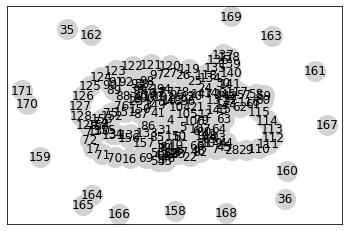

In [486]:
nx.draw_networkx(g, pos=position, node_color='lightgray', node_size=400)
figure = plt.figure() 
figure.set_size_inches(30, 20)

In [303]:
lista = []
if num_linha_origem in listaum[0][0]:
  lista = list(listaum[0][0] )

if num_linha_origem in listaum[1][0]:
  lista += [listaum[1][0]]

if num_linha_origem in listaum[2][0]:
  lista += [listaum[2][0]]

if num_linha_origem in listaum[3][0]:
  lista += [listaum[3][0]]

lista

[11, 7, 4, 3, 2, 5, (4, 1, 3, 10, 15), (9, 2, 3, 1)]

In [337]:
num_linha_origem = 4

In [340]:
lista = []
if num_linha_origem in listaum[0][0]:
  lista += [0]

elif num_linha_origem in listaum[1][0]:
  lista += [1]

elif num_linha_origem in listaum[2][0]:
  lista += [2]

elif num_linha_origem in listaum[3][0]:
  lista += [3]

elif num_linha_origem in listaum[4][0]:
  lista += [4]

elif num_linha_origem in listaum[5][0]:
  lista += [5]

elif num_linha_origem in listaum[6][0]:
  lista += [7]

elif num_linha_origem in listaum[7][0]:
  lista += [8]

elif num_linha_origem in listaum[8][0]:
  lista += [9]

elif num_linha_origem in listaum[9][0]:
  lista += [10]

elif num_linha_origem in listaum[10][0]:
  lista += [11]

elif num_linha_origem in listaum[11][0]:
  lista += [12]

display(lista)

lista = [x+1 for x in lista]
display(lista)


[0]

[1]

In [327]:
# Checa se é possível uma ligação direta
contador_listaum = 1
while contador_listaum < 14 :
  contador_listaum += 1
  if ((num_linha_origem in listaum[contador_listaum][0]) & (num_linha_final in listaum[contador_listaum][0])):
    print('DEVE-SE REALIZAR UMA BALDEAÇÃO NA LINHA', contador_listaum, 'ANTES DE CHEGAR AO DESTINO')
    break

TypeError: ignored

In [322]:
listaum

[[(11, 7, 4, 3, 2, 5)],
 [(4, 1, 3, 10, 15)],
 [(11, 10, 1, 4, 8)],
 [(9, 2, 3, 1)],
 [(9, 1, 2)],
 [(8, 1, 11, 10, 12)],
 [(9, 7, 3)],
 [(5, 4, 8)],
 [(2, 3, 11, 7, 12)],
 [(12, 3, 7, 2, 4)],
 [(11, 13, 3, 7, 10)],
 [12],
 [2]]

In [276]:
# Checa se é possível uma ligação direta

def def1(contador_listaum):
  while contador_listaum < 14 :
    contador_listaum += 1
    if (8 in listaum[contador_listaum][0]) :
      print(contador_listaum)
def1(-1)

2
5
7


TypeError: ignored

In [428]:
listaum

[[(11, 7, 4, 3, 2, 5)],
 [(4, 1, 3, 10, 15)],
 [(11, 10, 1, 4, 8)],
 [(9, 2, 3, 1)],
 [(9, 1, 2)],
 [(8, 1, 11, 10, 12)],
 [(9, 7, 3)],
 [(5, 4, 8)],
 [(2, 3, 11, 7, 12)],
 [(12, 3, 7, 2, 4)],
 [(11, 13, 3, 7, 10)],
 [12],
 [2]]

In [450]:
# Checa COM MULTIPLAS CONEXOES

possivel = []

for i in range(0, 13):
    if 15 in listaum[i]:
      possivel += [i]
    i += 1
  
possivel

[]

In [232]:
?possivel = []
contador=0
for i in range (len(listaum)):
        for j in range (i):
            if contador in listaum[i][0]:
                possivel.append((i))
            contador += 1

TypeError: ignored

In [233]:
listaum.index(1)

ValueError: ignored

In [222]:
contador = 14
possivel = []
j=0
for i in range(len(listaum)):
  if num_linha_origem in listaum[i][0]:
    print(i)

0
1
3
6
8
9
10


TypeError: ignored

In [220]:
listaum

[[(11, 7, 4, 3, 2, 5)],
 [(4, 1, 3, 10, 15)],
 [(11, 10, 1, 4, 8)],
 [(9, 2, 3, 1)],
 [(9, 1, 2)],
 [(8, 1, 11, 10, 12)],
 [(9, 7, 3)],
 [(5, 4, 8)],
 [(2, 3, 11, 7, 12)],
 [(12, 3, 7, 2, 4)],
 [(11, 13, 3, 7, 10)],
 [12],
 [2]]

In [98]:
num_linha_origem not in listaum[2][0]

True

In [112]:
display(num_linha_origem)
display(num_linha_final)

12

1

In [219]:
listaum = [ [linha1], [linha2], [linha3], [linha4], [linha5], [linha7], [linha8], [linha9], [linha10], [linha11], [linha12], [linha13], [linha15] ]
listaum

[[(11, 7, 4, 3, 2, 5)],
 [(4, 1, 3, 10, 15)],
 [(11, 10, 1, 4, 8)],
 [(9, 2, 3, 1)],
 [(9, 1, 2)],
 [(8, 1, 11, 10, 12)],
 [(9, 7, 3)],
 [(5, 4, 8)],
 [(2, 3, 11, 7, 12)],
 [(12, 3, 7, 2, 4)],
 [(11, 13, 3, 7, 10)],
 [12],
 [2]]

In [20]:
if   num_linha_origem.numero_linha[0] == 1  :
elif num_linha_origem.numero_linha[0] == 2  :
elif num_linha_origem.numero_linha[0] == 3  :
elif num_linha_origem.numero_linha[0] == 4  :
elif num_linha_origem.numero_linha[0] == 5  :
elif num_linha_origem.numero_linha[0] == 7  :
elif num_linha_origem.numero_linha[0] == 8  :
elif num_linha_origem.numero_linha[0] == 9  :
elif num_linha_origem.numero_linha[0] == 10 :
elif num_linha_origem.numero_linha[0] == 11 :
elif num_linha_origem.numero_linha[0] == 12 :
elif num_linha_origem.numero_linha[0] == 13 :
elif num_linha_origem.numero_linha[0] == 15 :


it is


In [58]:
linha3

(11, 10, 1, 4, 8)